## Comparing Bitcoin's beta to the USD index and S&P 500

In [30]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import datetime 
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import hvplot.pandas
import seaborn as sns
from yahoofinancials import YahooFinancials

In [31]:
#Five year data 
start_sp = datetime.datetime(2014, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

#create dataframes

#Bitcoin 

BTC_df_five = pdr.get_data_yahoo('BTC-USD', start_sp, end_sp)
BTC_df = pdr.get_data_yahoo('BTC-USD', start_sp, end_sp)

#SPDR S&P 500 ETF
SPX_df_five = pdr.get_data_yahoo('SPY', start_sp, end_sp)
SPX_df = pdr.get_data_yahoo('SPY', start_sp, end_sp)

In [32]:
#Drop extra columns to be left with closing price 
BTC_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
BTC_df_five.head()
SPX_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
SPX_df_five.head()

,Close
Date,
2014-10-01,194.350006
2014-10-02,194.380005
2014-10-03,196.520004
2014-10-06,196.289993
2014-10-07,193.259995


In [33]:
#Drop extra columns to be left with closing price 
BTC_df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
BTC_df.head()
SPX_df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
SPX_df.head()

,Close
Date,
2014-10-01,194.350006
2014-10-02,194.380005
2014-10-03,196.520004
2014-10-06,196.289993
2014-10-07,193.259995


In [34]:
BTC_df = BTC_df.rename(columns = {"Close": "BTC Closing Prices"}) 
SPX_df = SPX_df.rename(columns = {"Close": "SPX Closing Prices"}) 

In [35]:
combined_df_close = pd.concat([BTC_df, SPX_df],axis='columns', join="inner")
combined_df_close.head()

,BTC Closing Prices,SPX Closing Prices
Date,,
2014-10-01,375.071991,194.350006
2014-10-02,359.511993,194.380005
2014-10-03,328.865997,196.520004
2014-10-06,336.187012,196.289993
2014-10-07,352.940002,193.259995


In [36]:
combined_df_close['SPX Closing Prices'].hvplot() + combined_df_close['BTC Closing Prices'].hvplot()

:Layout
   .Curve.SPX_Closing_Prices :Curve   [Date]   (SPX Closing Prices)
   .Curve.BTC_Closing_Prices :Curve   [Date]   (BTC Closing Prices)

In [37]:
daily_returns = combined_df_close.pct_change()
daily_returns = daily_returns.rename(columns = {"BTC Closing Prices": "BTC Daily Returns"})
daily_returns = daily_returns.rename(columns= {"SPX Closing Prices":"SPX Daily Returns"})

In [38]:
daily_returns.head()

,BTC Daily Returns,SPX Daily Returns
Date,,
2014-10-01,NaN,NaN
2014-10-02,-0.041485,0.000154
2014-10-03,-0.085243,0.011009
2014-10-06,0.022261,-0.001170
2014-10-07,0.049832,-0.015436


In [39]:
correlation =  daily_returns.corr()
correlation

,BTC Daily Returns,SPX Daily Returns
BTC Daily Returns,1.000000,0.008111
SPX Daily Returns,0.008111,1.000000


In [41]:
# Calculates the covariance of all daily returns of Bitcoin vs. S&P 500
covariance = daily_returns['BTC Daily Returns'].cov(daily_returns['SPX Daily Returns'])
covariance

3.2300996667916498e-06

In [42]:
# Calculates variance of all S&P 500 daily returns
variance = daily_returns['SPX Daily Returns'].var()
variance

7.455223834692598e-05

In [77]:
# Calculate beta of all daily returns of BTC
btc_beta = covariance / variance
btc_beta_round = round(btc_beta, 2)
btc_beta_round

0.04

In [48]:
# Calculates the 30-day rolling covariance of Bitcoin vs. S&P 500 and plot the data
rolling_covariance_btc = daily_returns['BTC Daily Returns'].rolling(window=30).cov(daily_returns['SPX Daily Returns'])
rolling_covariance_btc.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of Bitcoin Returns vs. S&P 500 Returns')

:Curve   [Date]   (0)

In [49]:
# Calculate 30-day rolling covariance of Bitcoin vs. S&P 500 and plot the data
rolling_variance = daily_returns['SPX Daily Returns'].rolling(window=30).var()

# Calculate 30-day rolling beta of Bitcoin and plot the data
rolling_btc_beta = rolling_covariance_btc / rolling_variance

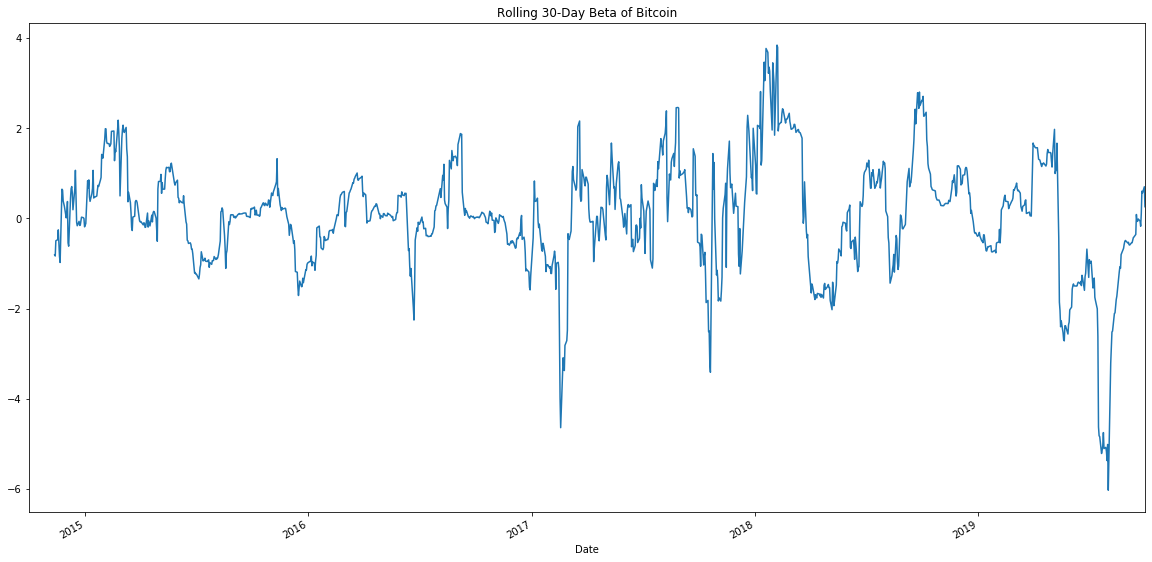

In [72]:
mc = rolling_btc_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Bitcoin')
mc.figure.savefig('rolling_btc_beta.png')

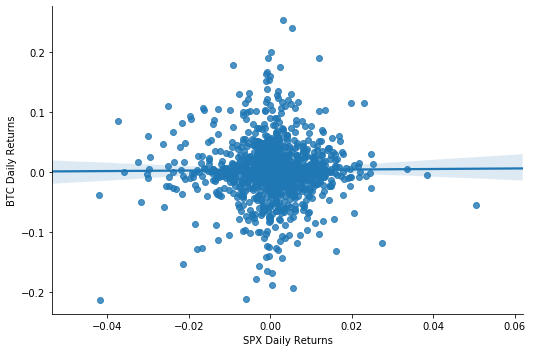

In [46]:
sns.lmplot(x='SPX Daily Returns', y='BTC Daily Returns', data=daily_returns, aspect=1.5, fit_reg=True)

In [52]:
#US Dollar/USDX - Index
USD_df_five = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)
USD_df = pdr.get_data_yahoo('DX-Y.NYB', start_sp, end_sp)

In [53]:
USD_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
USD_df_five.head()

,Close
Date,
2014-10-01,85.970001
2014-10-02,85.599998
2014-10-03,86.690002
2014-10-06,85.709999
2014-10-07,85.669998


In [56]:
USD_df_five = USD_df_five.rename(columns = {"Close": "USD Daily Returns"}) 
BTC_df_five = BTC_df_five.rename(columns = {"Close": "BTC Daily Returns"})

In [57]:
combined_df_five_USD = pd.concat([BTC_df_five, USD_df_five],axis='columns', join="inner")
combined_daily_return_five_USD = combined_df_five_USD.pct_change()
combined_daily_return_five_USD = combined_daily_return_five_USD.fillna(0, inplace=False)
combined_daily_return_five_USD.head()

,BTC Daily Returns,USD Daily Returns
Date,,
2014-10-01,0.000000,0.000000
2014-10-02,-0.041485,-0.004304
2014-10-03,-0.085243,0.012734
2014-10-06,0.022261,-0.011305
2014-10-07,0.049832,-0.000467


In [58]:
USD_df['Close'].hvplot() + combined_df_close['BTC Closing Prices'].hvplot()

:Layout
   .Curve.Close              :Curve   [Date]   (Close)
   .Curve.BTC_Closing_Prices :Curve   [Date]   (BTC Closing Prices)

In [59]:
correlation = combined_daily_return_five_USD.corr()
correlation

,BTC Daily Returns,USD Daily Returns
BTC Daily Returns,1.000000,-0.033865
USD Daily Returns,-0.033865,1.000000


In [60]:
# Calculates the covariance of all daily returns of Bitcoin vs. USD
covariance_USD = combined_daily_return_five_USD['BTC Daily Returns'].cov(combined_daily_return_five_USD['USD Daily Returns'])
covariance_USD

-6.893241972763763e-06

In [61]:
# Calculates variance of USD daily returns
variance_USD = combined_daily_return_five_USD['USD Daily Returns'].var()
variance_USD

1.9490860000679497e-05

In [74]:
# Calculate beta of all daily returns of BTC to USD
btc_beta_USD = covariance_USD / variance_USD
btc_beta_USD_round = round(btc_beta_USD,2)
btc_beta_USD_round

-0.35

Bitcoin's beta to the S&P500 is 0.04, indicating it does not follow the S&P 500 and has a low level of correlation
Bitcoin beta to the USD is -0.35, indicating it also does not follow the USD and has a slightly negative correlation


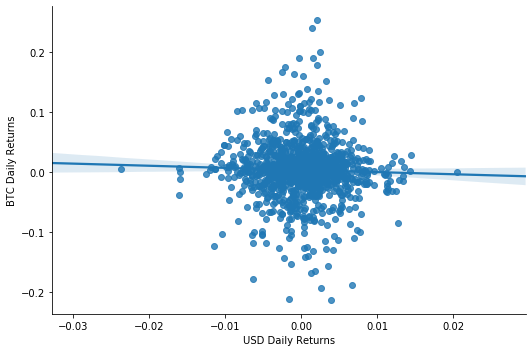

In [42]:
sns.lmplot(x='USD Daily Returns', y='BTC Daily Returns', data=combined_daily_return_five_USD, aspect=1.5, fit_reg=True)

In [67]:
# Calculates the 30-day rolling covariance of Bitcoin vs. USD and plot the data
rolling_covariance_btc_usd = combined_daily_return_five_USD['BTC Daily Returns'].rolling(window=30).cov(combined_daily_return_five_USD['USD Daily Returns'])
rolling_covariance_btc_usd.hvplot(figsize=(20, 10), title='Rolling 30-Day Covariance of Bitcoin Returns vs. USD Returns')

:Curve   [Date]   (0)

In [69]:
# Calculate 30-day rolling covariance of Bitcoin vs. USD and plot the data
rolling_variance = combined_daily_return_five_USD['USD Daily Returns'].rolling(window=30).var()

# Calculate 30-day rolling beta of Bitcoin and plot the data
rolling_btc_beta_usd = rolling_covariance_btc / rolling_variance

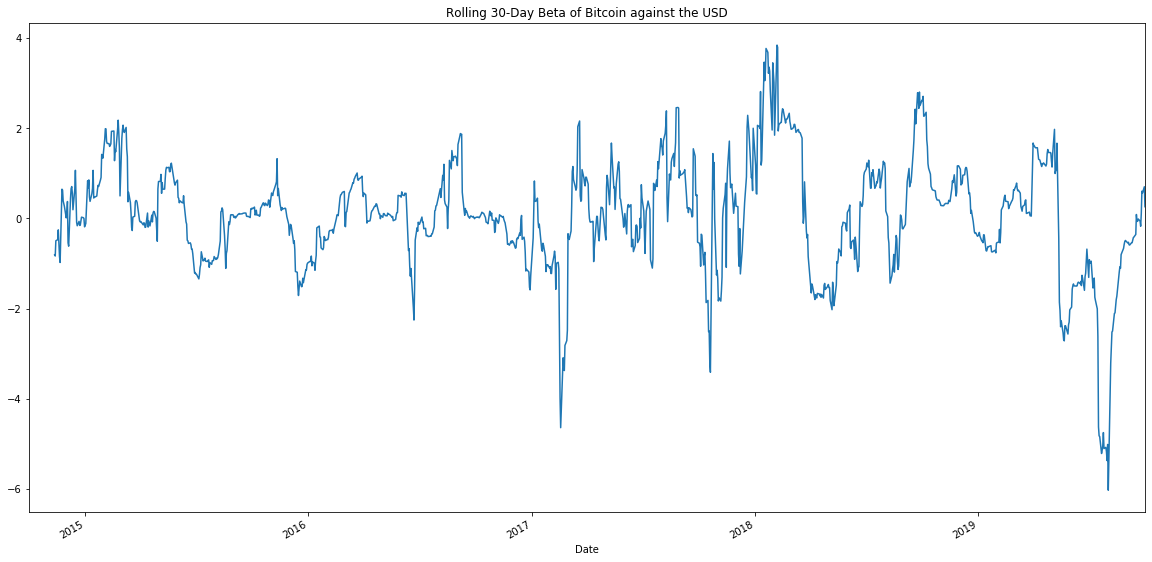

In [71]:
mc = rolling_btc_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Bitcoin against the USD')
mc.figure.savefig('rolling_btc_beta_usd.png')

In [79]:
print(f"Bitcoin's beta to the S&P500 is {btc_beta_round}, indicating it does not follow the S&P 500 and has a low level of correlation")
print(f"Bitcoin beta to the USD is {btc_beta_USD_round}, indicating it also does not follow the USD and has a slightly negative correlation")

Bitcoin's beta to the S&P500 is 0.04, indicating it does not follow the S&P 500 and has a low level of correlation
Bitcoin beta to the USD is -0.35, indicating it also does not follow the USD and has a slightly negative correlation
